### CAP6619 Assignment \#2 Question 6

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

2.10.0


In [2]:
# Loading data into notebook
data = np.load("olivetti_faces.npy")
target = np.load("olivetti_faces_target.npy")

In [11]:
data.shape


(400, 64, 64)

In [9]:
def show_face_img_for_each_class(images, unique_ids):
    fig, ax = plt.subplots(nrows=4, ncols=10, figsize=(18,9))
    ax = ax.flatten()

    rand = np.random.randint(10)
    for unique_id in unique_ids:
        image_index = unique_id * 10 + rand
        ax[unique_id].imshow(images[image_index], cmap='gray')
        ax[unique_id].set_xticks([])
        ax[unique_id].set_yticks([])
        ax[unique_id].set_title("Class {}".format(unique_id))
    plt.suptitle("A face for each class in the Olivetti faces dataset")

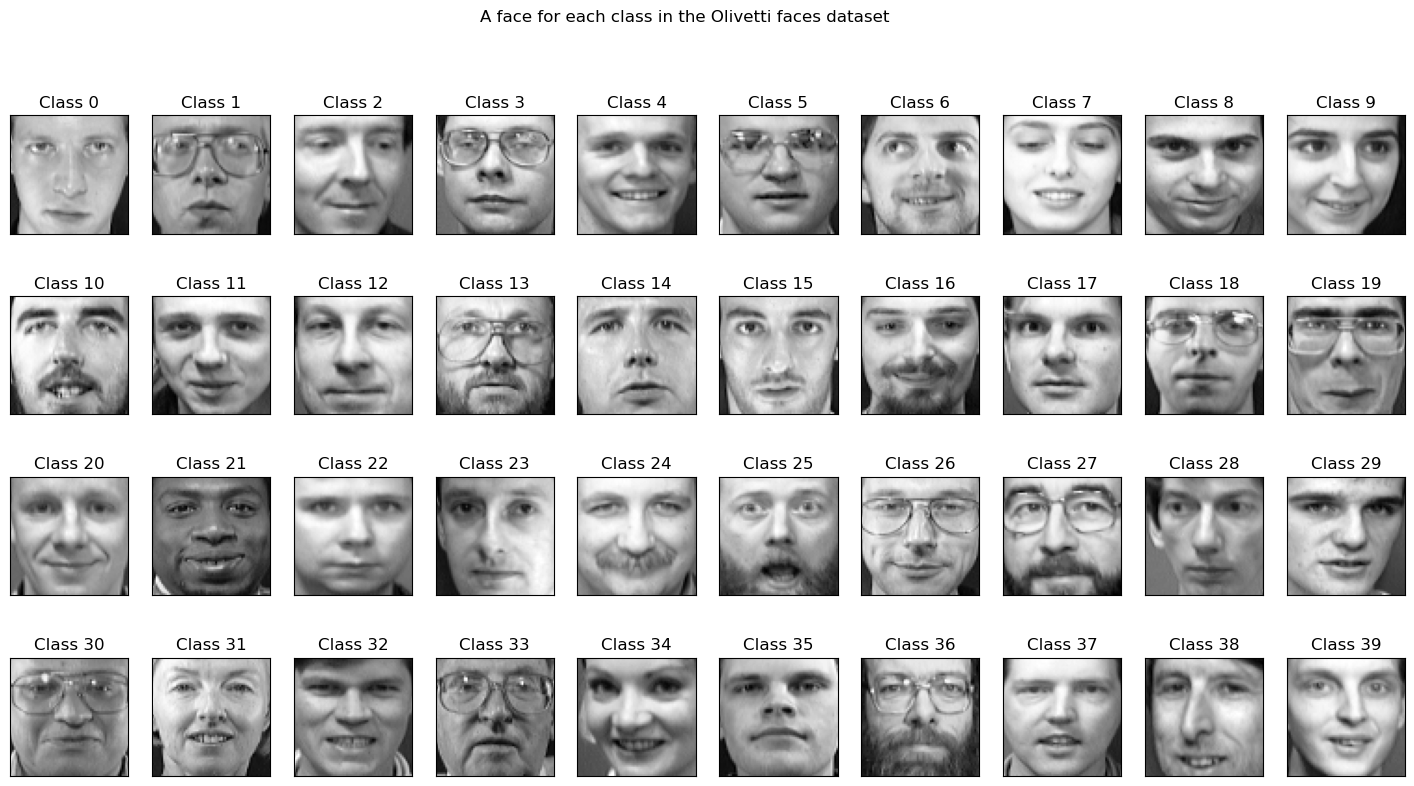

In [8]:
# Show at least one face image for each class in the Olivetti face dataset
show_face_img_for_each_class(data, np.unique(target))

In [10]:
# Randomly split the dataset into 60% training and 40% test samples
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.4, random_state=47)

In [12]:
# Create our one hidden layer neural network
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(64,64,1), name="Input"),
    keras.layers.Dense(10, activation='sigmoid', name='Hidden'),
    keras.layers.Dense(40, name="Output"),
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Flatten)             (None, 4096)              0         
                                                                 
 Hidden (Dense)              (None, 10)                40970     
                                                                 
 Output (Dense)              (None, 40)                440       
                                                                 
Total params: 41,410
Trainable params: 41,410
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train a one-hidden layer neural network with 10 hidden nodes.
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_split=0.2, epochs=300, verbose=1)

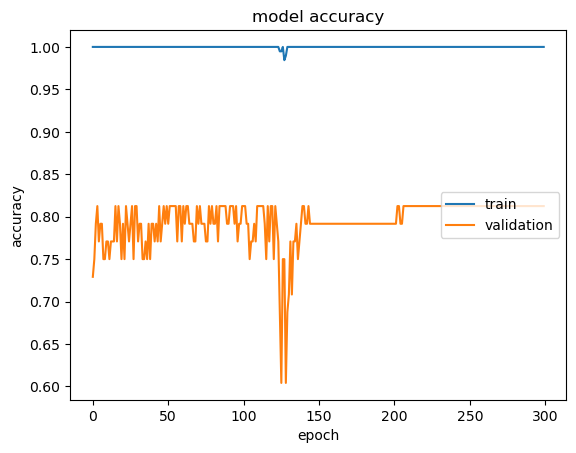

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='center right')
plt.show()

In [25]:
# Report the classification accuracy of the classifier on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

5/5 - 0s - loss: 1.4169 - accuracy: 0.7250 - 35ms/epoch - 7ms/step

Test accuracy: 0.7250000238418579


In [27]:
# Use one time 10-fold cross validation to compare the performance
# using different neural network architectures

In [31]:
# cross-validation framework
from sklearn.model_selection import KFold
kf = KFold(n_splits=10, shuffle=True)
kf.get_n_splits(data)
Acc = []

In [32]:
from sklearn.metrics import accuracy_score

In [34]:
# function to conduct cross validation of a given model
def run_model(model):
    for train_index, test_index in kf.split(data):
        X_train, X_test = data[train_index], data[test_index]
        y_train, y_test = target[train_index], target[test_index]
        model = model
        y_pred=model.predict(X_test)
        y_pred=np.argmax(y_pred,axis=1)
        Acc.append(accuracy_score(y_test, y_pred))

In [37]:
# 1) one-hidden layer NN with 10 hidden nodes
Acc = []
run_model(model)
print(np.mean(Acc), np.std(Acc))

2/2 [==============================] - 0s 4ms/step
0.8675 0.03716517186829629


In [41]:
# 2) one-hidden layer NN with 50 hidden nodes
model50 = keras.Sequential([
    keras.layers.Flatten(input_shape=(64,64,1), name="Input"),
    keras.layers.Dense(50, activation='sigmoid', name='Hidden'),
    keras.layers.Dense(40, name="Output"),
])
model50.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model50.fit(X_train, y_train, validation_split=0.2, epochs=300,verbose=0)
Acc = []
run_model(model50)
print(np.mean(Acc), np.std(Acc))

2/2 [==============================] - 0s 9ms/step
0.9199999999999999 0.04153311931459037


In [42]:
# 3) one-hidden layer NN with 500 hidden nodes
model500 = keras.Sequential([
    keras.layers.Flatten(input_shape=(64,64,1), name="Input"),
    keras.layers.Dense(500, activation='sigmoid', name='Hidden'),
    keras.layers.Dense(40, name="Output"),
])
model500.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model500.fit(X_train, y_train, validation_split=0.2, epochs=300,verbose=0)
Acc = []
run_model(model500)
print(np.mean(Acc), np.std(Acc))

2/2 [==============================] - 0s 4ms/step
0.9475000000000001 0.02610076627227636


In [48]:
# 4) two-hidden layer NN with 50 hidden nodes (1st) and 10 hidden nodes (2nd)
model2hl = keras.Sequential([
    keras.layers.Flatten(input_shape=(64,64,1), name="Input"),
    keras.layers.Dense(50, activation='sigmoid', name='HiddenLayer1'),
    keras.layers.Dense(10, activation='sigmoid', name='HiddenLayer2'),
    keras.layers.Dense(40, name="Output"),
])
model2hl.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model2hl.fit(X_train, y_train, validation_split=0.2, epochs=300,verbose=0)
Acc = []
run_model(model2hl)
print(np.mean(Acc), np.std(Acc))

2/2 [==============================] - 0s 4ms/step
0.31 0.04769696007084728


### Report and compare the cross-validation accuracy of the four neural networks
 - NN #1 accuracy: 0.8675
 - NN #2 accuracy: 0.9199
 - NN #3 accuracy: 0.9475
 - NN #4 accuracy: 0.31

From the results of these cross-validation, NN #3 (one-hidden layer with 500 hidden nodes) seems to be the most accurate in classifying the faces to the correct classes. It seems to be a general trend to have slightly improved accuracy as the number of hidden nodes increased within a one-hidden layer NN. NN #4's results suggest that the two-hidden layer NN has a risk of overfitting, although that may be able to remedied with other solutions or techniques.